In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
! git clone https://github.com/TransferHee/RL_project_STAR.git

Cloning into 'RL_project_STAR'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [6]:
validation = pd.read_csv('./RL_project_STAR/validation_of_Ensemble.csv', index_col=0)
validation[:5]

,Ensemble_account,date,A2C_account,PPO_account,SAC_account
0,1.000000e+07,2022-01-03,1.000000e+07,1.000000e+07,10000000.0
1,1.003955e+07,2022-01-04,1.003955e+07,9.952060e+06,10168555.2
2,1.000922e+07,2022-01-05,1.000922e+07,9.860060e+06,10258555.2
3,9.903223e+06,2022-01-06,9.903223e+06,9.741719e+06,10249555.2
4,9.893273e+06,2022-01-07,9.893273e+06,9.904969e+06,10352555.2


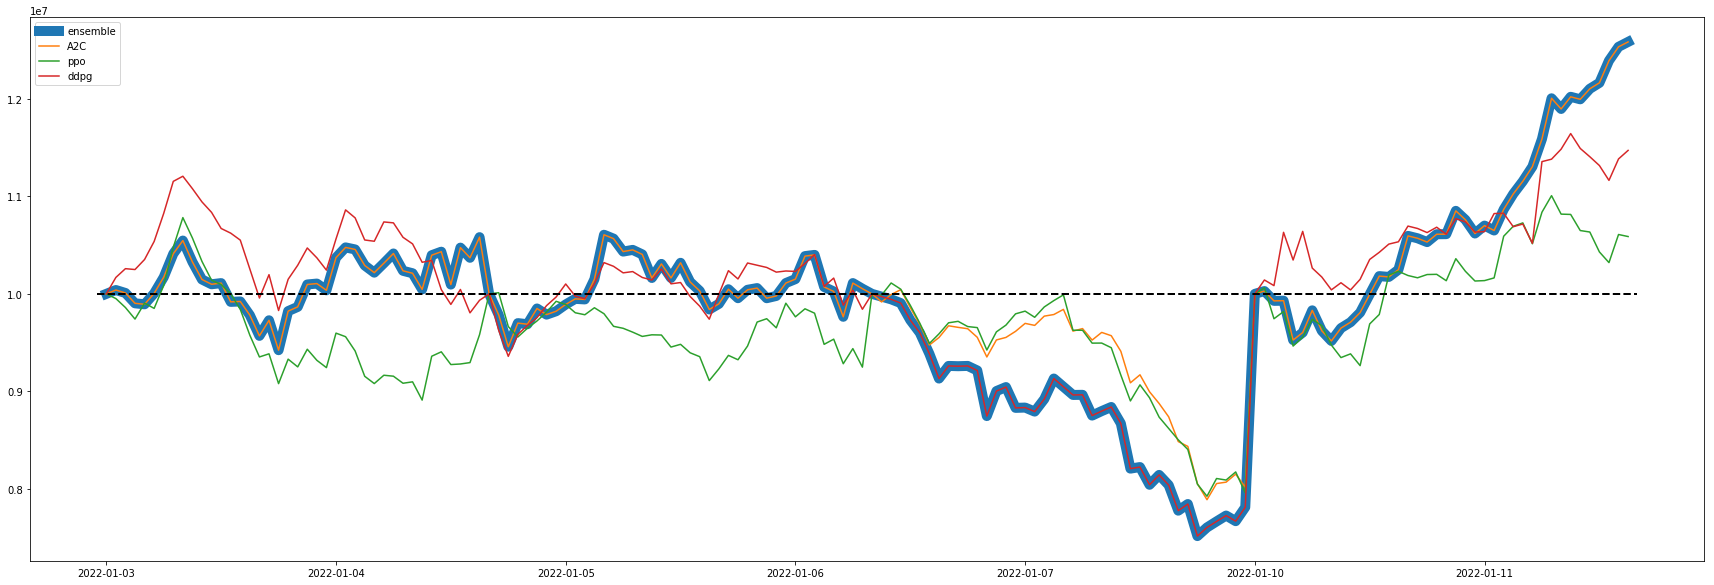

In [7]:
plt.figure(figsize=(30,10))

plt.plot(validation.date, validation.Ensemble_account, label='ensemble', linewidth=10)
# plt.plot(validation.Ensemble_account, label='ensembel', linewidth=10)
plt.plot(validation.A2C_account, label='A2C')
plt.plot(validation.PPO_account, label='ppo')
plt.plot(validation.SAC_account, label='ddpg')

x_ticks = [validation.iloc[i]['date'] for i in range(0,len(validation['date']),24)]
plt.xticks(x_ticks)
plt.axhline(1e+7, 0.04, 0.96, color='black', linestyle='--', linewidth=2)
plt.legend()
plt.show()

In [8]:
without_e = pd.read_csv('./RL_project_STAR/trading_results_without_e.csv', index_col = 0)
without_e[:5]

,date,A2C_account,PPO_account,DDPG_account,SAC_account,TD3_account
0,2022-01-03,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
1,2022-01-04,1.010773e+07,9.971678e+06,1.036701e+07,1.029412e+07,1.015472e+07
2,2022-01-05,1.011438e+07,1.005265e+07,1.068077e+07,1.054434e+07,1.033479e+07
3,2022-01-06,1.004278e+07,1.019271e+07,1.107696e+07,1.083917e+07,1.059753e+07
4,2022-01-07,1.008503e+07,1.024198e+07,1.150670e+07,1.120483e+07,1.093571e+07


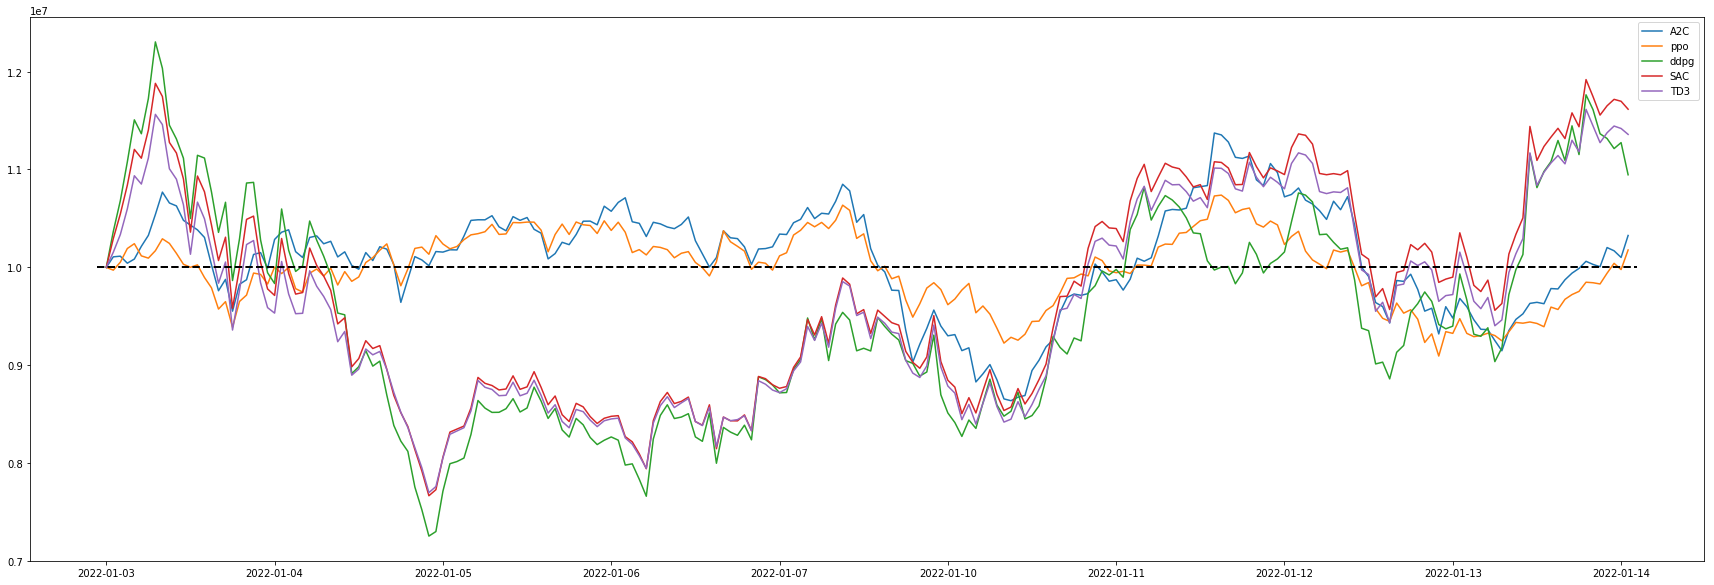

In [9]:
plt.figure(figsize=(30,10))

plt.plot(without_e.date, without_e.A2C_account, label='A2C')
plt.plot(without_e.PPO_account, label='ppo')
plt.plot(without_e.DDPG_account, label='ddpg')
plt.plot(without_e.SAC_account, label='SAC')
plt.plot(without_e.TD3_account, label='TD3')

x_ticks = [without_e.iloc[i]['date'] for i in range(0,len(without_e['date']),24)]
plt.xticks(x_ticks)
plt.axhline(1e+7, 0.04, 0.96, color='black', linestyle='--', linewidth=2)
plt.legend()
plt.show()

In [10]:
trade_e = pd.read_csv('./RL_project_STAR/trading_results_of_e.csv', index_col=0)
trade_e.columns = ['Ensemble_account', 'date']
trade_e[:5]

,Ensemble_account,date
0,1.000000e+07,2022-03-04
1,9.644112e+06,2022-03-07
2,9.455491e+06,2022-03-08
3,9.620700e+06,2022-03-10
4,9.741750e+06,2022-03-11


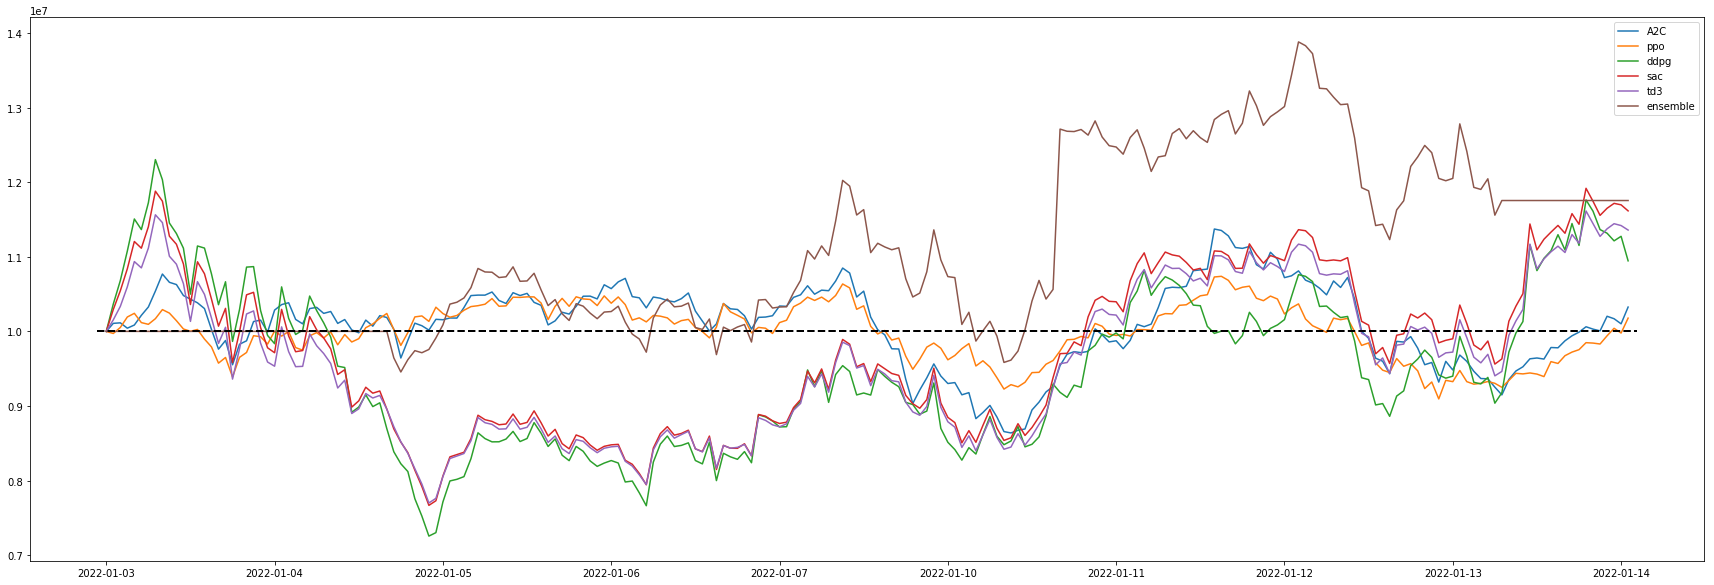

In [11]:
merged = pd.merge(without_e, trade_e, how='outer')
merged = merged.fillna(method='bfill')
final_trade = merged.fillna(method='ffill')

plt.figure(figsize=(30,10))

plt.plot(final_trade.date, final_trade.A2C_account, label='A2C')
plt.plot(final_trade.PPO_account, label='ppo')
plt.plot(final_trade.DDPG_account, label='ddpg')
plt.plot(final_trade.SAC_account, label='sac')
plt.plot(final_trade.TD3_account, label='td3')
plt.plot(final_trade.Ensemble_account, label='ensemble')

x_ticks = [final_trade.iloc[i]['date'] for i in range(0,len(final_trade['date']),24)]
plt.xticks(x_ticks)
plt.axhline(1e+7, 0.04, 0.96, color='black', linestyle='--', linewidth=2)
plt.legend()
plt.show()